# Part 1. Exploratory Data Analysis 

### Step 1. Check working directory and import the necessary libraries

In [220]:
import os
print(os.getcwd())

/Users/eylul/Desktop/LaunchCode/Project


In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#pip install matplotlib==3.1.0

# Figures inline and set visualization style
%matplotlib inline
sns.set()

### Step 2. Import and name the dataset

In [222]:
heart = pd.read_csv('heart.csv')
#check type
print(type(heart))
heart.head()

<class 'pandas.core.frame.DataFrame'>


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

### Step 3. Properties and description of the dataset
#### Step 3.1. rows and columns

In [223]:
heart.shape

(303, 14)

We have 303 rows and 14 columns.
#### Step 3.2. types of columns

In [224]:
heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

All of our variables are coded as integers or floating numbers.

#### Step 3.3. How is the dataset indexed?

In [225]:
heart.index

RangeIndex(start=0, stop=303, step=1)

#### Step 3.4. Basic description of the data

In [226]:
heart.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

* Our sample's age ranges from 29 to 77, with a mean of 54.37.
* Sex is dummy coded (1 = male, 0 = female). We have more males than females.
* Chest pain type ranges from 0 to 3.
* Our sample's resting blood pressure ranges from 94 to 200, with a mean of 131.62.
* Our sample's cholestoral ranges from 126 to 564, with a mean of 246.26.
* Our sample's fasting blood sugar is dummy coded, 1 for higher than 120 mg/dl, 0 for lower. We have more people who have fasting blood sugar lower than 120 mg/dl.
* Our sample's resting electrocardiographic results range from 0 to 2. 
* The maximum heart rate achieved ranges from 71 to 202, with a mean of 149.65.
* Exercise induced angina is dummy coded (1 = yes, 0 = no). Most of our of sample did not experience angina after exercise.
* ST depression induced by exercise relative to rest ranges from 0 to 6.2, with a mean of 1.04.
* Our sample's slope for the peak exercise ST segment ranges from 0 to 2, with a mean of 1.40.
* Our sample's number of major vessels colored by flourosopy ranges from 0 to 4. There might be an error during data entry for people who received 4 because according to Kaggle this measure ranges from 0-3 not 0-4.
* thal ranges from 0 to 3, although the explanation for this variable is 3 = normal; 6 = fixed defect; 7 = reversable defect. There might be a problem here as well.
* Our target (getting a heart disease or not) is binary coded (1 = yes, 0 = no).

Looking further into variables, from the original website, https://archive.ics.uci.edu/ml/datasets/heart+Disease, I found out what chest pain type (cp), resting electrocardiographic results, the slope of the peak exercise ST segment actually are:

cp: chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic
Here our values range from 0 to 3, I will assume that 0 corresponds to 1 of the original dataset.

restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

slope: the slope of the peak exercise ST segment
-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping
Here our values range from 0 to 2, I will assume that 0 corresponds to 1 of the original dataset.

For thal, the original website says "thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)", but our values are from 0 to 3. Therefore, we still have a problem here. Given that our data range from 0 to 3, and they report three values, it is hard to understand which values correspond to which.

Let's address these issues:

#### Step 3.5. Reorganizing the dataset

In [227]:
#Our cp values range from 0 to 3, not 1 to 4.
heart['cp'][heart['cp'] == 0] = 'typical angina'
heart['cp'][heart['cp'] == 1] = 'atypical angina'
heart['cp'][heart['cp'] == 2] = 'non-anginal pain'
heart['cp'][heart['cp'] == 3] = 'asymptomatic'

#Our restecg values range from 0 to 2, same as the original website.
heart['restecg'][heart['restecg'] == 0] = 'normal'
heart['restecg'][heart['restecg'] == 1] = 'ST-T wave abnormality'
heart['restecg'][heart['restecg'] == 2] = 'left ventricular hypertrophy'

#Our slope values range from 0 to 2, not 1 to 3.
heart['slope'][heart['slope'] == 0] = 'upsloping'
heart['slope'][heart['slope'] == 1] = 'flat'
heart['slope'][heart['slope'] == 2] = 'downsloping'

#Even though we do not know what the values of thal is, we know they are categorical, not numeric ranks. Therefore, I changed the type of thal.
heart['thal'] = heart['thal'].astype('object')

print(heart.dtypes)
heart.head()

age           int64
sex           int64
cp           object
trestbps      int64
chol          int64
fbs           int64
restecg      object
thalach       int64
exang         int64
oldpeak     float64
slope        object
ca            int64
thal         object
target        int64
dtype: object


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 

age  sex                cp  trestbps  chol  fbs                restecg  \
0   63    1      asymptomatic       145   233    1                 normal   
1   37    1  non-anginal pain       130   250    0  ST-T wave abnormality   
2   41    0   atypical angina       130   204    0                 normal   
3   56    1   atypical angina       120   236    0  ST-T wave abnormality   
4   57    0    typical angina       120   354    0  ST-T wave abnormality   

   thalach  exang  oldpeak        slope  ca thal  target  
0      150      0      2.3    upsloping   0    1       1  
1      187      0      3.5    upsloping   0    2       1  
2      172      0      1.4  downsloping   0    2       1  
3      178      0      0.8  downsloping   0    2       1  
4      163      1      0.6  downsloping   0    2       1

### Step 4. Missing values, outliers, duplicates
#### Step 4.1. Duplicates

In [228]:
heart.duplicated().sum()

1

There is one duplicate. Let's find its index.

In [229]:
duplicate = heart.duplicated() 
duplicate.index[duplicate].tolist()

[164]

The row 164 is a duplicate row.

In [230]:
heart.iloc[164]
heart.loc[heart.loc[:,'age']==38.0]

age  sex                cp  trestbps  chol  fbs                restecg  \
163   38    1  non-anginal pain       138   175    0  ST-T wave abnormality   
164   38    1  non-anginal pain       138   175    0  ST-T wave abnormality   
259   38    1      asymptomatic       120   231    0  ST-T wave abnormality   

     thalach  exang  oldpeak        slope  ca thal  target  
163      173      0      0.0  downsloping   4    2       1  
164      173      0      0.0  downsloping   4    2       1  
259      182      1      3.8         flat   0    3       0

Given that row 164 is identical with row 163, and chances of having identical values in all columns is low, I will eliminate row 164 and continue with my EDA.

In [231]:
heart = heart.drop_duplicates()
heart.shape

(302, 14)

#### Step 4.2. Missing values

In [232]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

We do not have missing data (yay!).

#### Step 4.3. Outliers
I will check outliers separately for wide and narrow-ranged variables.
##### Wide range

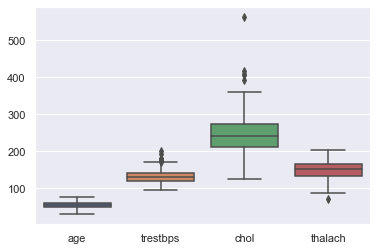

In [233]:
sns.boxplot(data = heart[['age','trestbps', 'chol', 'thalach']])

There seems to be outliers for all except age. Let's take a closer look.

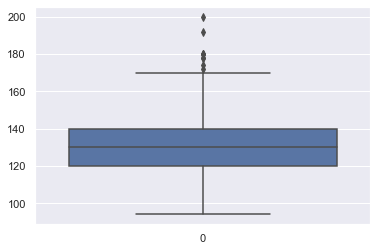

In [234]:
sns.boxplot(data = heart.trestbps)

Outliers do not seem that bad, transformation can potentially fix this.

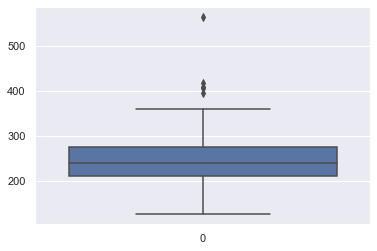

In [235]:
sns.boxplot(data = heart.chol)

One outlier is too high, potentially skewing the distribution. This might be an entry error.

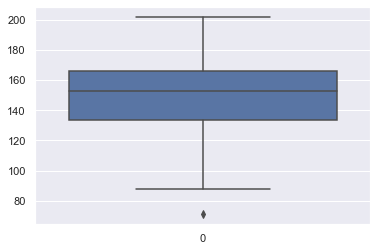

In [236]:
sns.boxplot(data = heart.thalach)

Outliers do not seem that bad, transformation can potentially fix this.

##### Narrow range

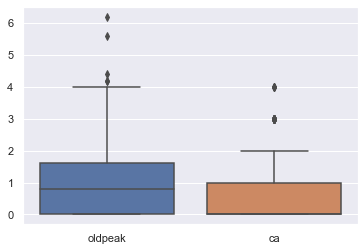

In [237]:
sns.boxplot(data = heart[['oldpeak', 'ca']])

There are outliers for both of these variables. Given that there should not be 4s for ca, and therefore, they are most likely to be a mistake during data entry, let's eliminate those. Let's first find out how many 4s are there.

In [238]:
heart.ca[heart['ca'] == 4].count()

4

Along with these 4 people, let's also exclude the person with extremely high cholestoral.

In [239]:
heart_new = heart[(heart['chol']< 500) & (heart['ca']< 4)]
heart_new.shape

(297, 14)

### Step 5. Relationships between the label and features

#### Step 5.1. Sex

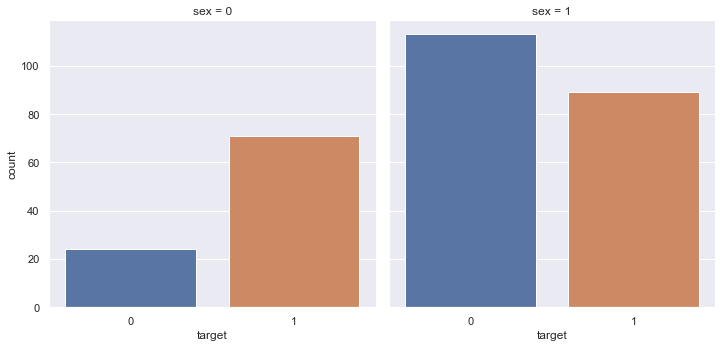

In [240]:
sns.catplot(x='target', col='sex', kind='count', data=heart_new)

In our dataset, females and males have different outcomes for heart diseases. Higher proportion of females have heart diseases than males. Let's calculate.

In [241]:
print('proportion for females:', heart_new[heart_new.sex == 0].target.sum()/heart_new[heart_new.sex == 0].target.count())
print('proportion for males:', heart_new[heart_new.sex == 1].target.sum()/heart_new[heart_new.sex == 1].target.count())

proportion for females: 0.7473684210526316
proportion for males: 0.4405940594059406


#### Step 5.2. Age

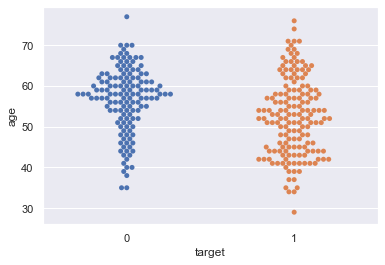

In [242]:
sns.swarmplot(x='target', y='age', data=heart_new)

Age does not seem to be highly related to getting heart diseases. If anything, there is a negative relationship. People are more likely to get heart diseases when they are younger, but this might be due to the fact that people with heart diseases do not live as long, and therefore, in our sample, people who are older most likely do not have heart diseases.

#### Step 5.3. Chest pain

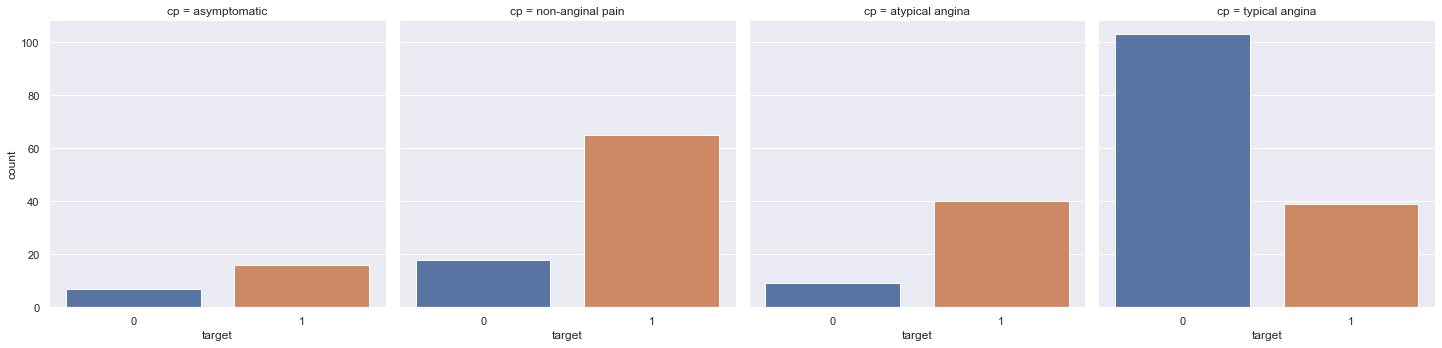

In [243]:
sns.catplot(x='target', col='cp', kind='count', data=heart_new)

Non-anginal pain and atypical angina seems to increase the chances of getting a hear diesase, meaning chest pain type might be a factor in it.

#### Step 5.4. Resting blood pressure

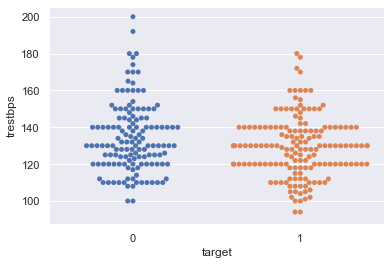

In [244]:
sns.swarmplot(x='target', y='trestbps', data=heart_new)

In [245]:
heart_new.groupby('target').trestbps.describe()

count        mean        std    min    25%    50%    75%    max
target                                                                 
0       137.0  134.416058  18.797545  100.0  120.0  130.0  145.0  200.0
1       160.0  129.256250  16.335418   94.0  120.0  130.0  140.0  180.0

Resting blood pressure does not seem to be highly related to heart disease, and if anything negatively related.

#### Step 5.5. Cholestoral

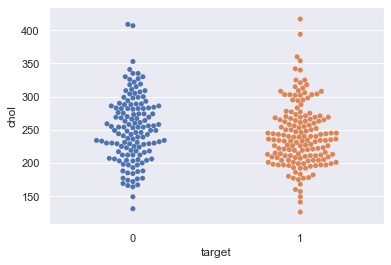

In [246]:
sns.swarmplot(x='target', y='chol', data=heart_new)

In [247]:
heart_new.groupby('target').chol.describe()

count        mean        std    min     25%    50%     75%    max
target                                                                   
0       137.0  251.116788  49.634853  131.0  217.00  249.0  283.00  409.0
1       160.0  241.318750  47.368802  126.0  208.75  235.0  267.25  417.0

Cholestoral does not seem to be highly related to heart disease, and if anything negatively related.

#### Step 5.6. Fasting blood sugar

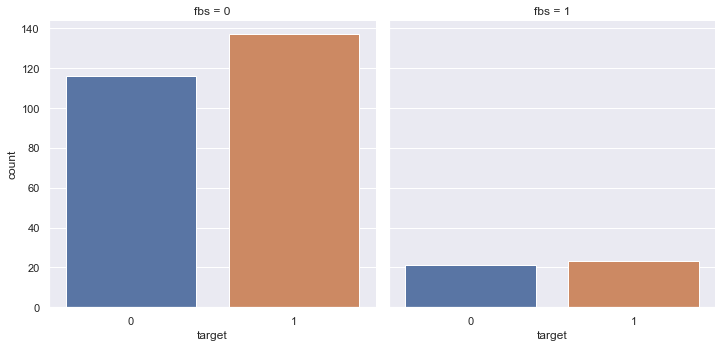

In [248]:
sns.catplot(x='target', col='fbs', kind='count', data=heart_new)

Fasting blood sugar does not seem to be related to heart disease.

#### Step 5.7. Resting electrocardiographic

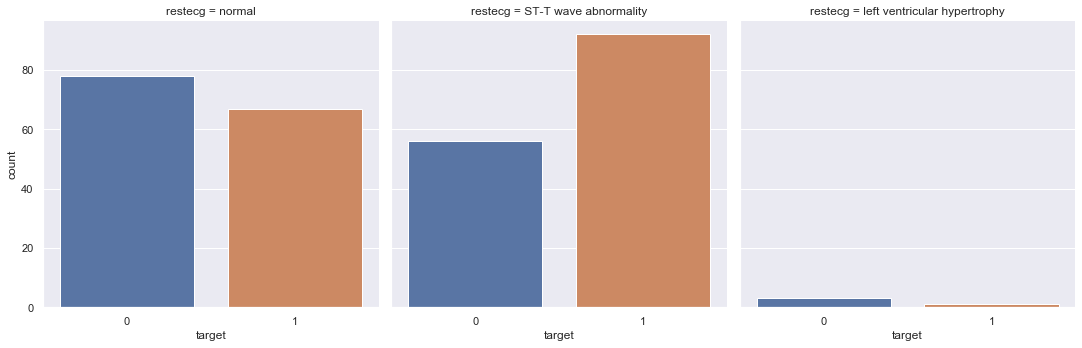

In [249]:
sns.catplot(x='target', col='restecg', kind='count', data=heart_new)

ST-T wave abnormality seems to increase the chances of getting a heart disease. 

#### Step 5.8. Maximum heart rate achieved

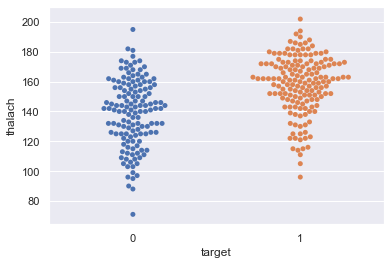

In [250]:
sns.swarmplot(x='target', y='thalach', data=heart_new)

In [251]:
heart_new.groupby('target').thalach.describe()

count        mean        std   min     25%    50%    75%    max
target                                                                 
0       137.0  139.072993  22.679232  71.0  125.00  142.0  156.0  195.0
1       160.0  158.300000  19.352019  96.0  148.75  161.0  172.0  202.0

Maximum heart rate achieved seems to be positively related to getting heart diseases.

#### Step 5.9. Exercise induded angina

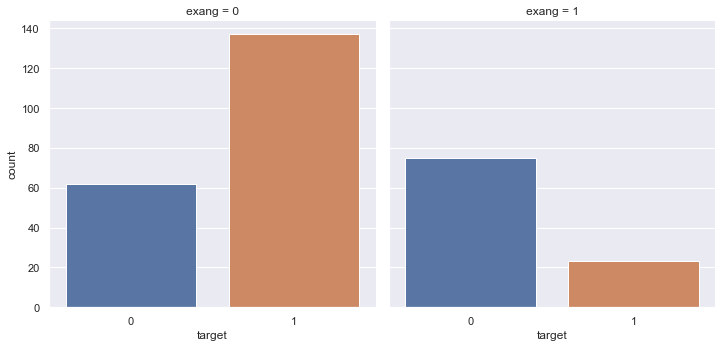

In [252]:
sns.catplot(x='target', col='exang', kind='count', data=heart_new)

Exercise induded angina seems to be negatively related to getting heart diseases.

#### Step 5.10. ST depression induced

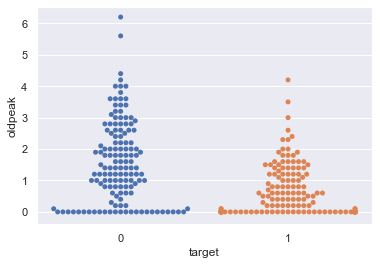

In [253]:
sns.swarmplot(x='target', y='oldpeak', data=heart_new)

In [254]:
heart_new.groupby('target').oldpeak.describe()

count     mean       std  min  25%  50%    75%  max
target                                                     
0       137.0  1.59635  1.298835  0.0  0.6  1.4  2.500  6.2
1       160.0  0.58875  0.784519  0.0  0.0  0.2  1.025  4.2

ST depression induced seems to be negatively related to getting heart diseases.

#### Step 5.11. The slope of the peak exercise ST segment

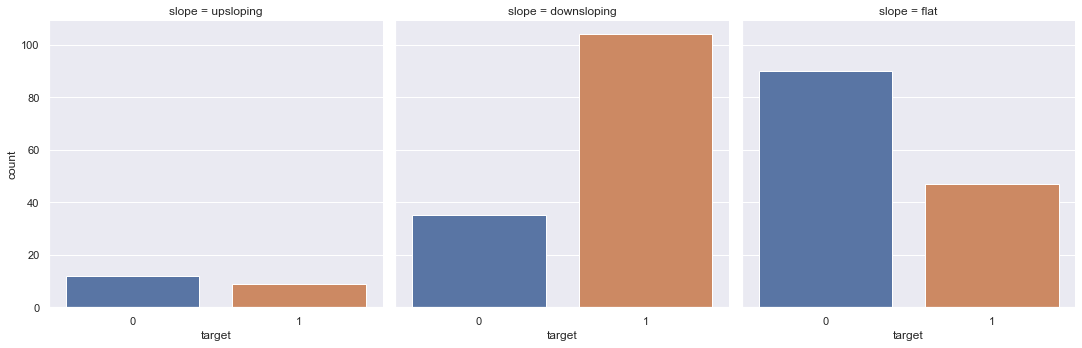

In [255]:
sns.catplot(x='target', col='slope', kind='count', data=heart_new)

Having a downsloping slope of the peak exercise ST segment seems to increase the chances of getting a heart disease.

#### Step 5.12. Number of major vessels

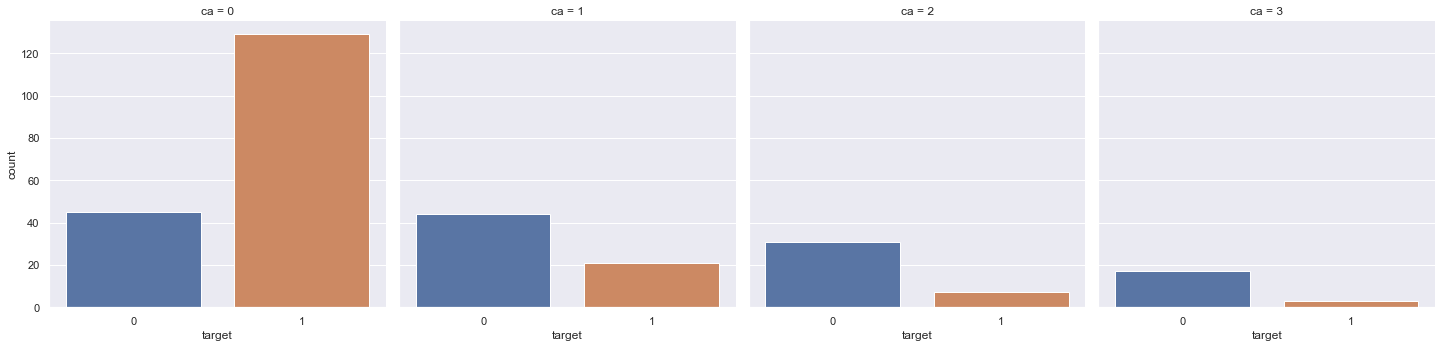

In [256]:
sns.catplot(x='target', col='ca', kind='count', data=heart_new)

The number of major vessels colored by flourosopy seems to be negatively related to getting heart diseases.

#### Step 5.13. thal

//anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


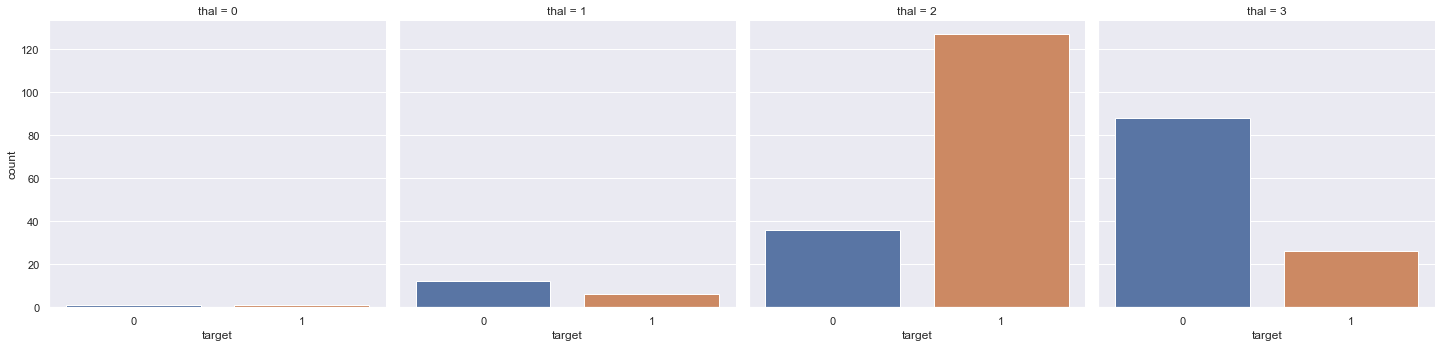

In [257]:
sns.factorplot(x='target', col='thal', kind='count', data=heart_new)

Thal seems to be related to getting heart diseases, but because this is a categorical variable and we do not know what the codes correspond to it is hard to make interpretations.

#### Step 5.14. Verifying these with correlations
Pearson correlation is used because these are interval level features (besides the labels).

In [258]:
heart_new[['age','trestbps', 'chol', 'thalach', 'target']].corr()

age  trestbps      chol   thalach    target
age       1.000000  0.294691  0.185768 -0.397342 -0.229524
trestbps  0.294691  1.000000  0.157286 -0.049409 -0.145789
chol      0.185768  0.157286  1.000000 -0.009804 -0.100687
thalach  -0.397342 -0.049409 -0.009804  1.000000  0.417164
target   -0.229524 -0.145789 -0.100687  0.417164  1.000000

Spearman-rank correlation is used because these are ordinal level features (besides the labels).


In [259]:
heart_new.rank()
heart_new[['oldpeak', 'ca', 'target']].corr('spearman')

oldpeak        ca    target
oldpeak  1.000000  0.266843 -0.422619
ca       0.266843  1.000000 -0.491692
target  -0.422619 -0.491692  1.000000

//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


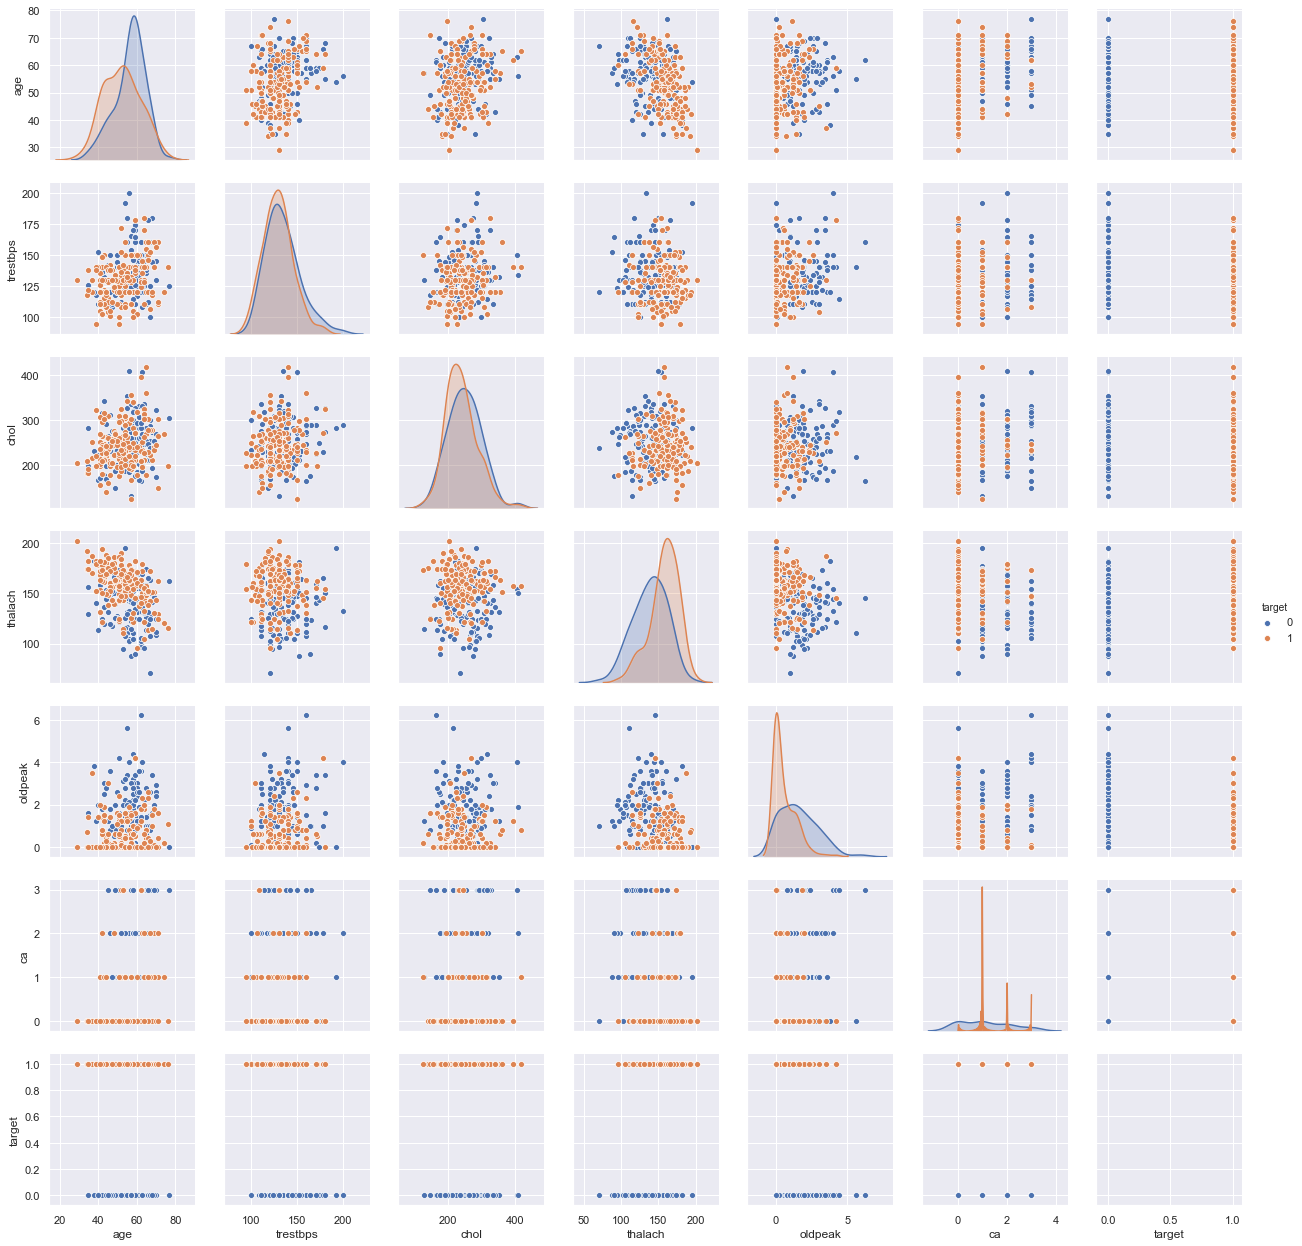

In [260]:
# a visual demonstration of this
sns.pairplot(heart_new[['age','trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'target']], hue='target')

### Step 6. Feature selection

In [261]:
heart_new = pd.get_dummies(heart_new, drop_first=True)
#move target column to the last
target = heart_new.pop('target')
heart_new['target'] =  target
heart_new.head()

age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  ca  \
0   63    1       145   233    1      150      0      2.3   0   
1   37    1       130   250    0      187      0      3.5   0   
2   41    0       130   204    0      172      0      1.4   0   
3   56    1       120   236    0      178      0      0.8   0   
4   57    0       120   354    0      163      1      0.6   0   

   cp_atypical angina  cp_non-anginal pain  cp_typical angina  \
0                   0                    0                  0   
1                   0                    1                  0   
2                   1                    0                  0   
3                   1                    0                  0   
4                   0                    0                  1   

   restecg_left ventricular hypertrophy  restecg_normal  slope_flat  \
0                                     0               1           0   
1                                     0               0           0   
2                                     0               1           0   
3                                     0               0           0   
4                                     0               0           0   

   slope_upsloping  thal_1  thal_2  thal_3  target  
0                1       1       0       0       1  
1                1       0       1       0       1  
2                0       0       1       0       1  
3                0       0       1       0       1  
4                0       0       1       0       1

In [262]:
heart_new.shape

(297, 20)

In [263]:
# Import `RandomForestClassifier`
from sklearn.ensemble import RandomForestClassifier

# Isolate Data, class labels and column values
X = heart_new.iloc[:,0:19]
Y = heart_new.iloc[:,-1]
names = heart_new.columns.values

# Build the model
rfc = RandomForestClassifier()

# Fit the model
rfc.fit(X, Y)

# Print the results
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), names), reverse=True))

Features sorted by their score:
[(0.1462, 'ca'), (0.1205, 'cp_typical angina'), (0.1117, 'oldpeak'), (0.1001, 'thalach'), (0.0903, 'age'), (0.0861, 'chol'), (0.0803, 'thal_2'), (0.0749, 'trestbps'), (0.0594, 'exang'), (0.0313, 'sex'), (0.0233, 'cp_non-anginal pain'), (0.0199, 'thal_3'), (0.0186, 'slope_flat'), (0.0149, 'restecg_normal'), (0.0112, 'fbs'), (0.0042, 'cp_atypical angina'), (0.0034, 'thal_1'), (0.0034, 'slope_upsloping'), (0.0, 'restecg_left ventricular hypertrophy')]


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Features as the number of major vessels, ST depression induced by exercise, maximum heart rate achieved, thal_2 and thal_3 (still unknown), resting blood pressure,  age, chest pain type of typical angina, exercise induced angina, and cholestoral seem to explain the chances of getting a heart disease more so than other factors.

# Part 2. Mini-Project Modeling

### Step 1.Feature engineering

Before modeling, I first will split the data into features and target, and then normalize features. I will continue to use heart_new as my dataset since the categorical variables are already dummy coded.

#### Step 1.1. Split features and labels

In [264]:
# X for features and y for labels
X = heart_new.drop('target',axis=1)
y = heart_new['target']
#check the shape of X
print(X.shape)
#check the shape of y
print(y.shape)

(297, 19)
(297,)


#### Step 1.2. Feature normalization
This is done for X only.

In [265]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

#### Step 1.3. Split into train and test

In [266]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = .2, random_state = 10)
#check sizes
print ('Train set:' , X_train.shape,  y_train.shape)
print ('Test set:' , X_test.shape,  y_test.shape)

Train set: (237, 19) (237,)
Test set: (60, 19) (60,)


### Step 2. Logistic Regression
Since our dependent variable is a binary variable (1s or 0s), and thus, our model should be a classification model (has heart disease, does not have heart disease), I will first use a logistic regression algorithm to model the data.

In [267]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score, validation_curve, cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score, auc, accuracy_score,confusion_matrix, classification_report, confusion_matrix, f1_score

#### Step 2.1. Logistic regression without any parameter change

In [268]:
log_reg = LogisticRegression(solver='liblinear')

log_reg_1 = log_reg.fit(X_train,y_train)
log_reg_1_predict = log_reg_1.predict(X_test)

log_reg_1_acc = accuracy_score(y_test,log_reg_1_predict)
log_reg_1_f1 = f1_score(y_test, log_reg_1_predict, average="weighted")
print('Logistic Regression accuracy score is: ', log_reg_1_acc)
print('Logistic Regression F1 score is: ', log_reg_1_f1)

Logistic Regression accuracy score is:  0.8666666666666667
Logistic Regression F1 score is:  0.8663690476190476


##### Step 2.1.1 Confusion Matrix

In [269]:
log_reg_1_conf = confusion_matrix(y_test, log_reg_1_predict)

print('Confusion Matrix:\n', log_reg_1_conf)
print('True Positive:', log_reg_1_conf[1,1])
print('True Negative:', log_reg_1_conf[0,0])
print('False Positive:', log_reg_1_conf[0,1])
print('False Negative:', log_reg_1_conf[1,0])

Confusion Matrix:
 [[24  5]
 [ 3 28]]
True Positive: 28
True Negative: 24
False Positive: 5
False Negative: 3


We have more false positives than false negatives, meaning that more people are falsely diagnosed with heart disease.

##### Step 2.1.2 Sensitivity and Specificity

In [270]:
total=sum(sum(log_reg_1_conf))

log_reg_1_spec = log_reg_1_conf[0,0]/(log_reg_1_conf[0,0]+log_reg_1_conf[1,0])
print('Specificity :', log_reg_1_spec)

log_reg_1_sens = log_reg_1_conf[1,1]/(log_reg_1_conf[1,1]+log_reg_1_conf[0,1])
print('Sensitivity :', log_reg_1_sens)

Specificity : 0.8888888888888888
Sensitivity : 0.8484848484848485


Although we can correctly identify those without disease at a high rate (.89), we are worse at correctly identifying those with disease aka true positive rate (.85).

##### Step 2.1.3 ROC Curve

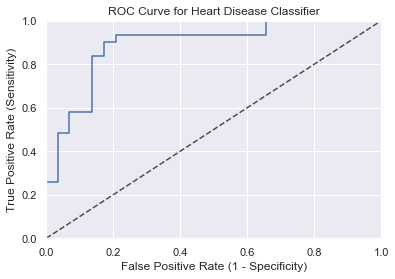

In [289]:
log_reg_1_quant = log_reg_1.predict_proba(X_test)[:, 1]

log_reg_1_fpr, log_reg_1_tpr, log_reg_1_thresholds = roc_curve(y_test, log_reg_1_quant)

fig, ax = plt.subplots()
ax.plot(log_reg_1_fpr, log_reg_1_tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve for Heart Disease Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [272]:
log_reg_1_auc=auc(log_reg_1_fpr, log_reg_1_tpr)
print("Area under the curve:", log_reg_1_auc)

Area under the curve: 0.8898776418242491


#### Step 2.2. Logistic regression with regularization
In the model above, we were not using regularization, a method to avoid overfitting during training. This might be why we got accuracy around .866. Regularization penalizes features that do not explain the label very well, allowing for generalization. Now I will first find the optimal regularization level, and then use it for logistic regression. I will first use Grid Search and then plotting to decide on best regularization value as well as method (L1 or L2).

##### First method: Grid Search

In [299]:
from sklearn.model_selection import GridSearchCV
log_reg_grid = LogisticRegression(solver="liblinear")

#set parameters
parameters = {"C":np.logspace(-1,1,10), "penalty":["l1","l2"]}

#train the model
log_reg_grid_model = GridSearchCV(log_reg_grid, param_grid=parameters, n_jobs=1, cv=5)
log_reg_grid_model.fit(X_train, y_train)

print("Best Parameters for Logistic Regression:",log_reg_grid_model.best_params_)

log_reg_prediction = log_reg_grid_model.predict(X_test)

print("Accuracy:", accuracy_score(log_reg_prediction, y_test))
print("Confusion Metrix:\n", confusion_matrix(log_reg_prediction, y_test))

Best Parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2'}
Accuracy: 0.8833333333333333
Confusion Metrix:
 [[24  2]
 [ 5 29]]


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


##### Alternative method: Plotting

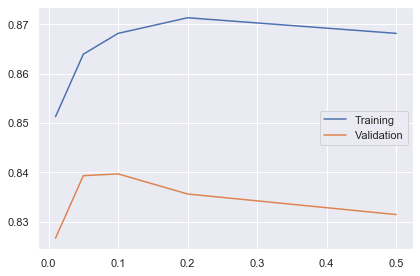

In [274]:
param_range = [0.01,0.05,0.1,0.2,0.5]
train_scores, valid_scores = validation_curve(log_reg, X_train, y_train, "C", param_range, cv = 5, scoring = "accuracy")

train_mean = np.mean(train_scores,axis=1)
valid_mean = np.mean(valid_scores,axis=1)

plt.plot(param_range, train_mean, label="Training")
plt.plot(param_range, valid_mean, label="Validation")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

Either way, I will use a regularization of 0.1 in the following model.

In [275]:
log_reg = LogisticRegression(C=0.1, solver='liblinear')

log_reg_2 = log_reg.fit(X_train,y_train)
log_reg_2_predict = log_reg_2.predict(X_test)

log_reg_2_acc = accuracy_score(y_test,log_reg_2_predict)
log_reg_2_f1 = f1_score(y_test, log_reg_2_predict, average="weighted")
print('Logistic Regression accuracy score is: ', log_reg_2_acc)
print('Logistic Regression F1 score is: ', log_reg_2_f1)

Logistic Regression accuracy score is:  0.8833333333333333
Logistic Regression F1 score is:  0.8828438228438228


##### Step 2.2.1 Confusion Matrix

In [276]:
log_reg_2_conf = confusion_matrix(y_test, log_reg_2_predict)

print('Confusion Matrix:\n', log_reg_2_conf)
print('True Positive:', log_reg_2_conf[1,1])
print('True Negative:', log_reg_2_conf[0,0])
print('False Positive:', log_reg_2_conf[0,1])
print('False Negative:', log_reg_2_conf[1,0])

Confusion Matrix:
 [[24  5]
 [ 2 29]]
True Positive: 29
True Negative: 24
False Positive: 5
False Negative: 2


Our false positive went down by 1, and our true positive went up by 1.

##### Step 2.2.2 Sensitivity and Specificity

In [277]:
total=sum(sum(log_reg_2_conf))

log_reg_2_spec = log_reg_2_conf[0,0]/(log_reg_2_conf[0,0]+log_reg_2_conf[1,0])
print('Specificity :', log_reg_2_spec)

log_reg_2_sens = log_reg_2_conf[1,1]/(log_reg_2_conf[1,1]+log_reg_2_conf[0,1])
print('Sensitivity :', log_reg_2_sens)

Specificity : 0.9230769230769231
Sensitivity : 0.8529411764705882


Sensitivity is only slightly better.

##### Step 2.2.3 ROC Curve

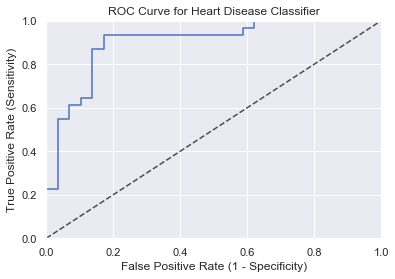

In [278]:
log_reg_2_quant = log_reg_2.predict_proba(X_test)[:, 1]

log_reg_2_fpr, log_reg_2_tpr, log_reg_2_thresholds = roc_curve(y_test, log_reg_2_quant)

fig, ax = plt.subplots()
ax.plot(log_reg_2_fpr, log_reg_2_tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve for Heart Disease Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [279]:
log_reg_2_auc=auc(log_reg_2_fpr, log_reg_2_tpr)
print("Area under the curve:", log_reg_2_auc)

Area under the curve: 0.8998887652947719


#### Step 2.3 Check feature importance

In [280]:
heart_new.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'cp_atypical angina', 'cp_non-anginal pain', 'cp_typical angina',
       'restecg_left ventricular hypertrophy', 'restecg_normal', 'slope_flat',
       'slope_upsloping', 'thal_1', 'thal_2', 'thal_3', 'target'],
      dtype='object')

In [281]:
import eli5
from eli5.sklearn import PermutationImportance
log_reg_perm = PermutationImportance(log_reg_2, random_state=10).fit(X_test, y_test)
eli5.show_weights(log_reg_perm, feature_names=['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'cp_atypical angina', 'cp_non-anginal pain', 'cp_typical angina',
       'restecg_left ventricular hypertrophy', 'restecg_normal', 'slope_flat',
       'slope_upsloping', 'thal_1', 'thal_2', 'thal_3'])

In our logistic regression model, number of major vessels colored by flourosopy in the patient ranks as the most important feature. ST depression induced by exercise relative to rest ranks as the second most important feature. Whether the patient has typical angina chest pain or not ranks as the third important feature.

### Step 3. Random Forest

As a second model, I will use a random forest. I chose using a random forest model over using a decision model, because decision trees are more prone to overfitting. Random forest can reduce the effect of this overfitting by ensembling multiple decision trees.

In [282]:
from sklearn.ensemble import RandomForestClassifier

#### Step 3.1. Random forest without tuning parameters
I will first start with the default estimator of 100.

In [292]:
rand_for = RandomForestClassifier(random_state = 10)

rand_for_1 = rand_for.fit(X_train,y_train)
rand_for_1_predict = rand_for_1.predict(X_test)

rand_for_1_acc = accuracy_score(y_test,rand_for_1_predict)
rand_for_1_f1 = f1_score(y_test, rand_for_1_predict, average="weighted")
print('Random Forest accuracy score is: ', rand_for_1_acc)
print('Random Forest F1 score is: ', rand_for_1_f1)

Random Forest accuracy score is:  0.7833333333333333
Random Forest F1 score is:  0.7831527276095213


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


##### Step 3.1.1 Confusion Matrix

In [293]:
rand_for_1_conf = confusion_matrix(y_test, rand_for_1_predict)

print('Confusion Matrix:\n', rand_for_1_conf)
print('True Positive:', rand_for_1_conf[1,1])
print('True Negative:', rand_for_1_conf[0,0])
print('False Positive:', rand_for_1_conf[0,1])
print('False Negative:', rand_for_1_conf[1,0])

Confusion Matrix:
 [[24  5]
 [ 8 23]]
True Positive: 23
True Negative: 24
False Positive: 5
False Negative: 8


This is worse than what we got from the logistic regression, but parameters are not yet specified. Before that, let's calculate sensitivity and specificity as well.

##### Step 3.1.2 Sensitivity and Specificity

In [295]:
total=sum(sum(rand_for_1_conf))

rand_for_1_spec = rand_for_1_conf[0,0]/(rand_for_1_conf[0,0]+rand_for_1_conf[1,0])
print('Specificity :', rand_for_1_spec)

rand_for_1_sens = rand_for_1_conf[1,1]/(rand_for_1_conf[1,1]+rand_for_1_conf[0,1])
print('Sensitivity :', rand_for_1_sens)

Specificity : 0.75
Sensitivity : 0.8214285714285714


##### Step 3.1.3 ROC Curve

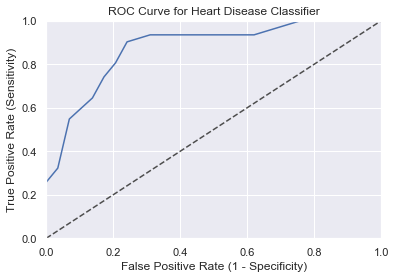

In [296]:
rand_for_1_quant = rand_for_1.predict_proba(X_test)[:, 1]

rand_for_1_fpr, rand_for_1_tpr, rand_for_1_thresholds = roc_curve(y_test, rand_for_1_quant)

fig, ax = plt.subplots()
ax.plot(rand_for_1_fpr, rand_for_1_tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve for Heart Disease Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [297]:
rand_for_1_auc=auc(rand_for_1_fpr, rand_for_1_tpr)
print("Area under the curve:", rand_for_1_auc)

Area under the curve: 0.874860956618465


#### Step 3.2. Random forest with optimal parameters
In the model above, we did not specify parameters such as maximum depth or number of estimators. This might have contributed to lower accuracy we got be why we got accuracy around .783. Specifying maximum depth allows for generalization of the model and protects against overfitting. The number of estimators decide how many decision trees will randomly go into the forest. This also affects how well the model explains and predicts the data.

##### First Method: Grid Search

In [318]:
rand_for_grid = RandomForestClassifier(random_state = 10)

#set parameters
parameters = {'max_depth': [5, 6, 10, 20, 50, 80, 100, None],
              'n_estimators': [5, 6, 10, 20, 50, 80, 100]}

#train the model
rand_for_grid_model = GridSearchCV(rand_for_grid, param_grid=parameters, cv=5)
rand_for_grid_model.fit(X_train, y_train)

print("Best Parameters for Random Forest:",rand_for_grid_model.best_params_)

rand_for_prediction = rand_for_grid_model.predict(X_test)

print("Accuracy:", accuracy_score(rand_for_prediction, y_test))
print("Confusion Metrix:\n", confusion_matrix(rand_for_prediction, y_test))

Best Parameters for Random Forest: {'max_depth': 6, 'n_estimators': 10}
Accuracy: 0.8666666666666667
Confusion Metrix:
 [[25  4]
 [ 4 27]]


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


##### Alternative method: Plotting for max_depth
I will use this plot to check whether there is any other value of max_depth that fits better to n_estimators of 10.

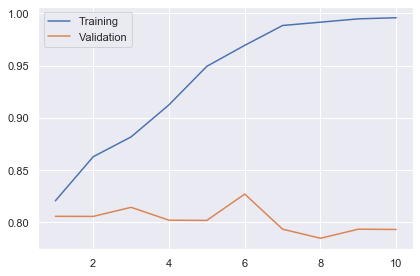

In [320]:
rand_for_plot = RandomForestClassifier(random_state = 10, n_estimators = 10)
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
train_scores, valid_scores = validation_curve(rand_for, X_train, y_train, "max_depth", param_range, cv=5, scoring="accuracy")

train_mean = np.mean(train_scores,axis=1)
valid_mean = np.mean(valid_scores,axis=1)

plt.plot(param_range, train_mean, label="Training")
plt.plot(param_range, valid_mean, label="Validation")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

Based on these two methods, I will use max_depth of 6, with n_estimator of 10.

In [321]:
rand_for = RandomForestClassifier(max_depth = 6, n_estimators = 10, random_state = 10)

rand_for_2 = rand_for.fit(X_train,y_train)
rand_for_2_predict = rand_for_2.predict(X_test)

rand_for_2_acc = accuracy_score(y_test,rand_for_2_predict)
rand_for_2_f1 = f1_score(y_test, rand_for_2_predict, average="weighted")
print('Random Forest accuracy score is: ', rand_for_2_acc)
print('Random Forest F1 score is: ', rand_for_2_f1)

Random Forest accuracy score is:  0.8666666666666667
Random Forest F1 score is:  0.8666666666666667


##### Step 3.2.1 Confusion Matrix

In [322]:
rand_for_2_conf = confusion_matrix(y_test, rand_for_2_predict)

print('Confusion Matrix:\n', rand_for_2_conf)
print('True Positive:', rand_for_2_conf[1,1])
print('True Negative:', rand_for_2_conf[0,0])
print('False Positive:', rand_for_2_conf[0,1])
print('False Negative:', rand_for_2_conf[1,0])

Confusion Matrix:
 [[25  4]
 [ 4 27]]
True Positive: 27
True Negative: 25
False Positive: 4
False Negative: 4


All measures improved!

##### Step 3.2.2 Sensitivity and Specificity

In [323]:
total=sum(sum(rand_for_2_conf))

rand_for_2_spec = rand_for_2_conf[0,0]/(rand_for_2_conf[0,0]+rand_for_2_conf[1,0])
print('Specificity :', rand_for_2_spec)

rand_for_2_sens = rand_for_2_conf[1,1]/(rand_for_2_conf[1,1]+rand_for_2_conf[0,1])
print('Sensitivity :', rand_for_2_sens)

Specificity : 0.8620689655172413
Sensitivity : 0.8709677419354839


Again, both specificity and sensitivity improved after tuning the parameters.

##### Step 3.2.3 ROC Curve

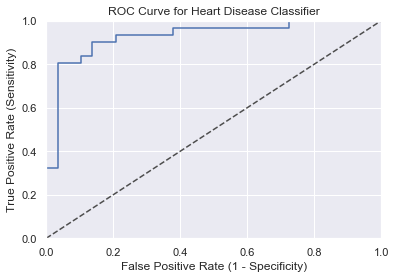

In [324]:
rand_for_2_quant = rand_for_2.predict_proba(X_test)[:, 1]

rand_for_2_fpr, rand_for_2_tpr, rand_for_2_thresholds = roc_curve(y_test, rand_for_2_quant)

fig, ax = plt.subplots()
ax.plot(rand_for_2_fpr, rand_for_2_tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve for Heart Disease Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [325]:
rand_for_2_auc=auc(rand_for_2_fpr, rand_for_2_tpr)
print("Area under the curve:", rand_for_2_auc)

Area under the curve: 0.92880978865406


#### Step 3.3 Check feature importance

In [327]:
rand_for_perm = PermutationImportance(rand_for_2, random_state=10).fit(X_test, y_test)
eli5.show_weights(rand_for_perm, feature_names=['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'cp_atypical angina', 'cp_non-anginal pain', 'cp_typical angina',
       'restecg_left ventricular hypertrophy', 'restecg_normal', 'slope_flat',
       'slope_upsloping', 'thal_1', 'thal_2', 'thal_3'])

In our random forest model, whether the patient has typical angina chest pain or not ranks as the most important feature. ranks as the third important feature. ST depression induced by exercise relative to rest ranks as the second most important feature as in the logistic regression model. Thal_2 ranks as the third important feature. Unlike logistic regression, the number of major vessels colored by flourosopy in the patient did not rank in the top three important features. Both logistic regression and random forest led to comparable accuracy scores (.883 and .866, respectively) as well as other quantiative metrics.